In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('_data.csv',index_col=0)
df.head(10) 

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
5,274837728,3,Квартира,м. Смоленская (5 мин пешком),"Москва, 1-й Смоленский переулок, 21",92.0,3/7,NaN,"470000.0 руб./ За месяц, Залог - 470000 руб., ...",+79684728732,...,NaN,NaN,NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Smolensky De Luxe,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/274837728
6,273643908,"5, Оба варианта",Квартира,м. Арбатская (4 мин пешком),"Москва, переулок Романов, 3С1",213.0/140.0/20.0,4/5,наземная,"350000.0 руб./ За месяц, Залог - 350000 руб., ...","+79175135482, +79099269384",...,На улицу и двор,Совмещенный (2),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/273643908
7,274475342,3,Квартира,м. Смоленская (3 мин пешком),"Москва, улица Арбат, 43С3",98.0/63.0/9.0,"2/4, Монолитный",подземная,"250000.0 руб./ За месяц, Залог - 250000 руб., ...",+79152004882,...,Во двор,"Совмещенный (1), Раздельный (1)","Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),Нет,https://www.cian.ru/rent/flat/274475342
8,273973191,3,Квартира,м. Смоленская (9 мин пешком),"Москва, Новинский бульвар, 18С1",120.0/95.0/10.0,"5/10, Сталинский",открытая,"130000.0 руб./ За месяц, Залог - 130000 руб., ...",+79153429055,...,На улицу,Совмещенный (1),Можно с животными,"Мебель на кухне, Ванна, Стиральная машина, Кон...",NaN,NaN,3.0,Пасс (1),Нет,https://www.cian.ru/rent/flat/273973191
9,272900409,4,Квартира,м. Арбатская (10 мин пешком),"Москва, улица Арбат, 30/3С1",90.0/66.0/10.0,"2/7, Сталинский",открытая,"210000.0 руб./ За месяц, Залог - 210000 руб., ...",+79850610614,...,На улицу и двор,"Совмещенный (1), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,310.0,Пасс (1),Да,https://www.cian.ru/rent/flat/272900409


In [6]:
# Первый вывод dataset и сразу бросается в глаза тот факт (первые три записи), что Адрес различных объявлений одинаковый, также ближайшее метро по данному адресу одинаковое,
# однако, время пути до метро в разных объявлениях отличается.

# Пример 
df.loc[:2, ['Метро', 'Адрес']]

# Не будем предавать этому сильно влияющее значение, но признаку "Метро" стоит уделить некоторое время в Релизе2, чтобы осуществить обработку и вынести, например, 
# время до ближайшего метро (хотя сначала мы попытаемся узнать, действительно ли оно ближайшее) в отдельную feature, а также определиться с выбросами и различными
# временными показателями пути до метро в случае одинакового адреса дома.

,Метро,Адрес
0,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27"
1,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27"
2,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27"


In [7]:
# Узнаем объем данных, с которыми мы будем работать
count = df.shape
f'Всего мы имеем {count[0]} записей и {count[1]} признаков.'

'Всего мы имеем 23368 записей и 24 признаков.'

In [8]:
# Выявим название наших features, которые мы имеем в DataFrame, чтобы понять, с чем мы работаем и что потенциально нам может пригодится или, наоборот, не пригодится
df.columns.to_list()

# Вывод: Уже можем понять, основные features, которые нам не будут нужны (не будут влиять на цену аренда квартиры), например, первый столбец "Unnamed: 0", можно будет 
# в Релизе2 сразу удалить. Также подобному критерию не соответствуют столбцы "Ссылка на объявление", "Телефоны", "Серия дома"

# Также существует другая группа features, которая вызывает сомнения по поводу влияния на цену аренда квартиры, например, наличие Мусоропровода и других частей, причастных
# к квартире (Окно, Балкон, Санузел, Высота потолков, Наличие и кол-во лифтов, длительность пути до Метро) и так далее
# В Релизе 2 отберем нужные features, и займемся их очисткой

['ID  объявления',
 'Количество комнат',
 'Тип',
 'Метро',
 'Адрес',
 'Площадь, м2',
 'Дом',
 'Парковка',
 'Цена',
 'Телефоны',
 'Описание',
 'Ремонт',
 'Площадь комнат, м2',
 'Балкон',
 'Окна',
 'Санузел',
 'Можно с детьми/животными',
 'Дополнительно',
 'Название ЖК',
 'Серия дома',
 'Высота потолков, м',
 'Лифт',
 'Мусоропровод',
 'Ссылка на объявление']

In [9]:
# Посмотрим информацию о датасете
df.info()

# Уже можем увидеть, что количество записей во Фрейме 23368, а значит есть столбцы, с наименьшим количеством значений Non-null (не нулевое), что
# говорит о том, что в этих столбцах есть значения NaN

# Следующий вывод: тип объекта во всех столбцах (кроме трёх - один из них просто дополнительная строка индексации наших записей, её можно убрать) является object
# Этот тип данных является составным, то есть внутри него могут лежат различные типы данных, включая обычные str (строки)
# Значит мы уже должны понимать, что, например, столбец "Цена" мы должны обработать: избавиться от лишнего, либо какую-то важную информацию превратить в новую feature, 
# которая сможет влиять на предсказание модели наилучшим образом

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23368 entries, 0 to 23367
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID  объявления            23368 non-null  int64  
 1   Количество комнат         22327 non-null  object 
 2   Тип                       23368 non-null  object 
 3   Метро                     22053 non-null  object 
 4   Адрес                     23368 non-null  object 
 5   Площадь, м2               23368 non-null  object 
 6   Дом                       23368 non-null  object 
 7   Парковка                  9951 non-null   object 
 8   Цена                      23368 non-null  object 
 9   Телефоны                  23368 non-null  object 
 10  Описание                  23368 non-null  object 
 11  Ремонт                    20613 non-null  object 
 12  Площадь комнат, м2        14458 non-null  object 
 13  Балкон                    15390 non-null  object 
 14  Окна  

In [10]:
# Выведем summary нашего датасета, однако, две наши величины не имеют никакого смысла в этом, глобальных представлений о датасете, они нам не дадут
df.describe()

# В целом, что и требовалось доказать, единствая feature, которая потенциально сможет повлиять на цену аренды квартиры, является "Высота потолков"

,ID объявления,"Высота потолков, м"
count,2.336800e+04,11206.00000
mean,2.676265e+08,2.98345
std,1.876862e+07,7.61472
min,1.072986e+08,1.20000
25%,2.712663e+08,2.64000
50%,2.739030e+08,2.64000
75%,2.746872e+08,2.80000
max,2.750064e+08,320.00000


In [11]:
# Попробуем вывести кол-во уникальных элементов каждой feature
df.nunique()

# Как видим, ID-объявления полностью совпадает с общим количеством записей в датасете, значит каждая запись является уникальной, и мы не столкнемся с дубликатами.

# Также feature "Количество комнат" заставляет нас обратить внимание на то, что там существуют странные элементы, так как по логике вещей, количество комнат
# не должно превышать цифры 5-6. Далее обратим на это внимание.

ID  объявления              23368
Количество комнат              24
Тип                             1
Метро                        5866
Адрес                       12850
Площадь, м2                 11255
Дом                          2565
Парковка                        5
Цена                         3922
Телефоны                    13172
Описание                    23078
Ремонт                          4
Площадь комнат, м2           3990
Балкон                         18
Окна                            3
Санузел                        20
Можно с детьми/животными        3
Дополнительно                 528
Название ЖК                  1798
Серия дома                    393
Высота потолков, м             95
Лифт                           34
Мусоропровод                    2
Ссылка на объявление        23368
dtype: int64

In [12]:
# Посмотрим, какие существуют значения и их количество в каждой feature

for feat in df.columns[2:-1]:
    print(df[feat].value_counts(dropna=False))
    print()
    print()

Квартира    23368
Name: Тип, dtype: int64


NaN                                 1315
м. Академическая (10 мин пешком)      41
м. Водный стадион (5 мин пешком)      40
м. Приморская (None мин пешком)       35
м. Щелковская (15 мин пешком)         34
                                    ... 
м. Печатники (38 мин пешком)           1
м. Печатники (35 мин пешком)           1
м. Авиамоторная (1 мин пешком)         1
м. Фонвизинская (16 мин пешком)        1
м. Солнцево (5 мин на машине)          1
Name: Метро, Length: 5867, dtype: int64


Москва, Чапаевский переулок, 3                                       63
Москва, улица Василисы Кожиной, 13                                   46
Москва, улица 1-я Леонова, 18                                        42
Москва, Мосфильмовская улица, 8                                      37
Москва, Гостиничный проезд, 8К1                                      32
                                                                     ..
Краснодарский край, Сочи, Центр

In [13]:
d_nan = {}

for feat in df.columns[2:-1]:
    if df[feat].isna().sum() != 0:
        d_nan[feat] = df[feat].isna().sum()
d_nan

{'Метро': 1315,
 'Парковка': 13417,
 'Ремонт': 2755,
 'Площадь комнат, м2': 8910,
 'Балкон': 7978,
 'Окна': 6613,
 'Санузел': 2672,
 'Можно с детьми/животными': 6096,
 'Дополнительно': 357,
 'Название ЖК': 17520,
 'Серия дома': 21205,
 'Высота потолков, м': 12162,
 'Лифт': 5500,
 'Мусоропровод': 10522}

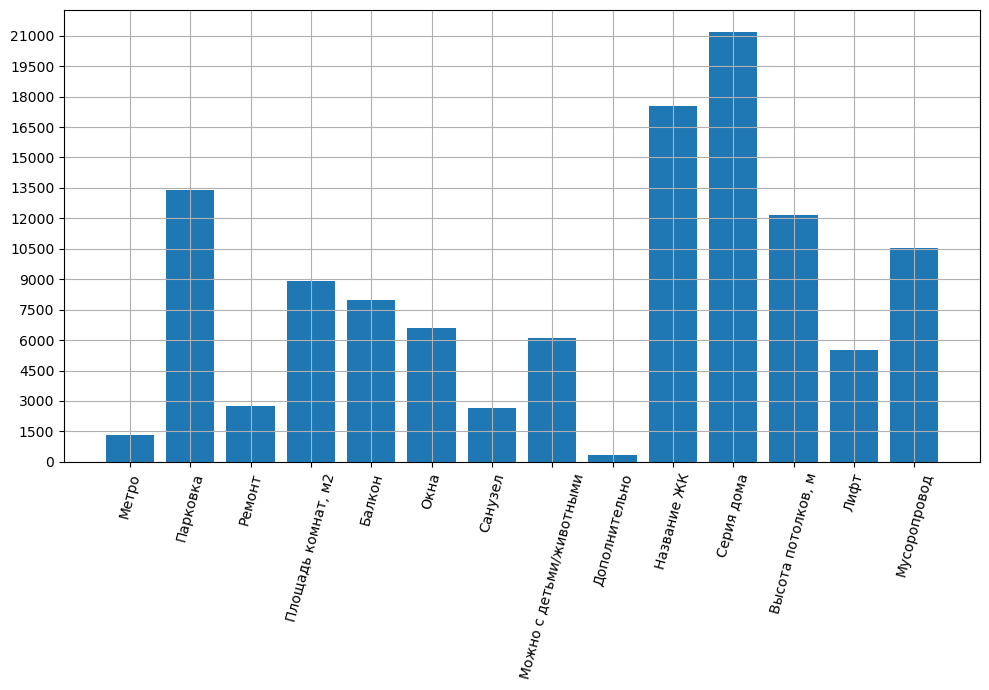

In [14]:
# Построим гистрограмму для данного словаря, чтобы визуально увидеть feature и соответствующее им кол-во значений NaN
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

ax.bar(d_nan.keys(), d_nan.values());
ax.grid()
ax.yaxis.set_major_locator(MultipleLocator(base=1500))
plt.xticks(rotation=75)
plt.tight_layout();

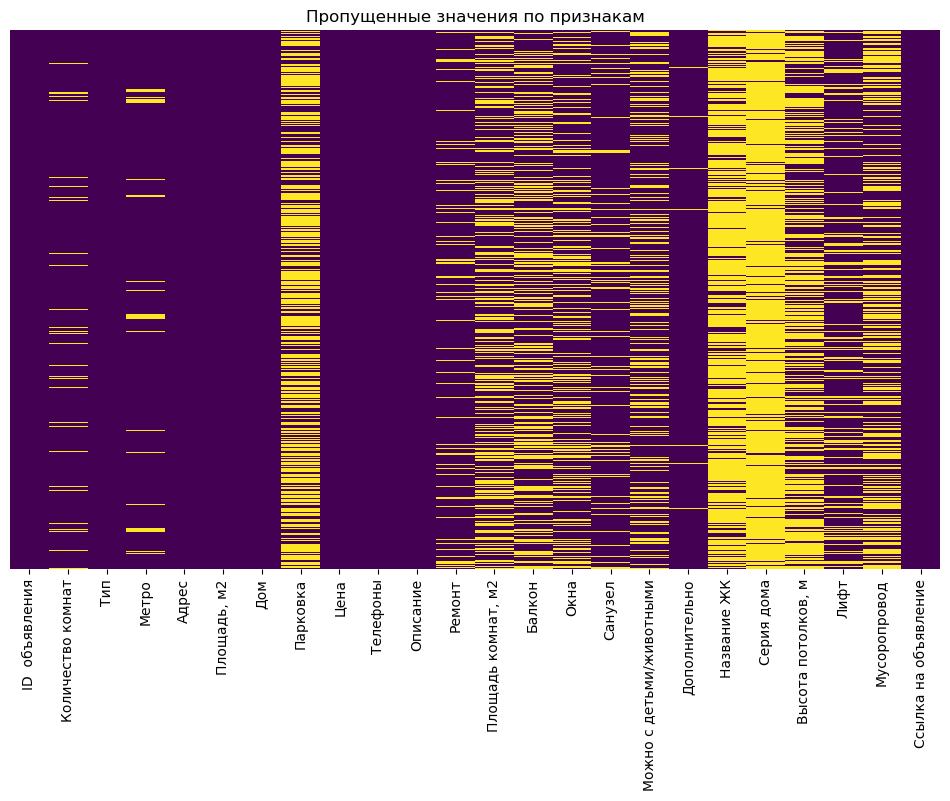

In [15]:
# И другой вариант визуализации пропущенных данных
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Пропущенные значения по признакам")
plt.show()